In [1]:
%tensorflow_version 1.x

_git_branch = 'trainset'

import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


# Import code from gitHub

In [2]:
import json
import subprocess
import sys
import time

import numpy as np
from IPython.core.display import display, HTML
from google.colab import files

!pip install overrides
!pip install pyjarowinkler
 
def exec(x):
  r = subprocess.check_output(x, shell=True)
  r = r.decode('unicode-escape').encode('latin1').decode('utf8')
  print(r)


print(f"fetching code from GitHub.....{_git_branch}")
try:
  exec('rm -r nlp_tools')
except:
  pass
exec(f'git clone --single-branch --branch {_git_branch} https://github.com/nemoware/analyser.git nlp_tools')

print('🦊 GIT revision:')
exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

sys.path.insert(0, 'nlp_tools')

print('❤️importing Code from GitHub ... DONE')

#----- other deps

import nltk
nltk.download('punkt')

  Created wheel for overrides: filename=overrides-2.8.0-cp36-none-any.whl size=5609 sha256=358688445a2189a40fab5d933f12e904a31c4e9f1465200c6d13225e047cbab6
  Stored in directory: /root/.cache/pip/wheels/df/f1/ba/eaf6cd7d284d2f257dc71436ce72d25fd3be5a5813a37794ab
Successfully built overrides
fetching code from GitHub.....trainset

🦊 GIT revision:
1306
* trainset
+print_parameters

Keep some embeddings clean from noise

Adding 5% of syntetic outliers to trainset


❤️importing Code from GitHub ... DONE
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_emb(matrix):
    
  mt = matrix.T
  
  with sns.axes_style("white"):
    plt.figure(figsize=(25, 6))
    ax = sns.heatmap(mt, square=False,  cmap="RdYlBu", center=0)
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Prepare trainset


#### Mount drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Read meta

In [5]:
import pandas as pd
from os import path

from trainsets.trainset_tools import TrainsetBalancer, SubjectTrainsetManager

TRAINSETS_PATH='/content/drive/My Drive/GazpromOil/trainsets'
VERSION_PATH='1_1_19'
TRAINSET_META_FN='contracts.subjects-manually-filtered.csv'

csv_path = path.join(TRAINSETS_PATH, 'meta_info', TRAINSET_META_FN)

# trainset_meta = pd.read_csv(csv_path, encoding='utf-8' )
# trainset_rows = trainset_meta[trainset_meta['valid']]

dataset_manager = SubjectTrainsetManager(csv_path)

# print(dataset_manager.trainset_rows.info())
# trainset_rows.head()

Nemoware Analyser v1.6.8
[nltk_data] Downloading package punkt to /root/nltk_data...


Using TensorFlow backend.


[nltk_data]   Package punkt is already up-to-date!
loading word cases stats model /content/nlp_tools/analyser/vocab/word_cases_stats.pickle
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 280 to 789
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idx          510 non-null    int64  
 1   section      510 non-null    object 
 2   subject      510 non-null    object 
 3   confidence   510 non-null    float64
 4   valid        510 non-null    bool   
 5   header       510 non-null    object 
 6   _id          510 non-null    object 
 7   len          510 non-null    int64  
 8   pickle       510 non-null    object 
 9   org-1-alias  404 non-null    object 
 10  org-2-alias  341 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 44.3+ KB
None


###  One-1-hots: subject codes -> `subject_name_1hot_map`

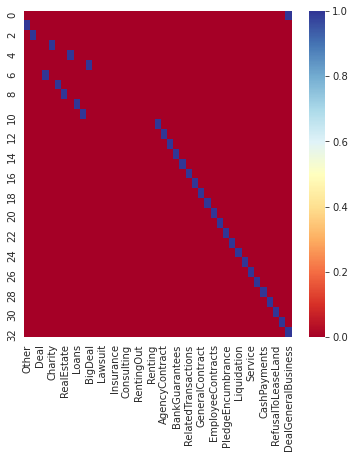

In [6]:
mt = np.array(list( dataset_manager.subject_name_1hot_map.values()))
with sns.axes_style("white"):
  plt.figure(figsize=(6, 6))
  ax = sns.heatmap(mt, square=False,  cmap="RdYlBu")
  ax.set_xticklabels(dataset_manager.subject_name_1hot_map.keys())
  plt.show()
 

### Balance trainset
TODO: consider https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

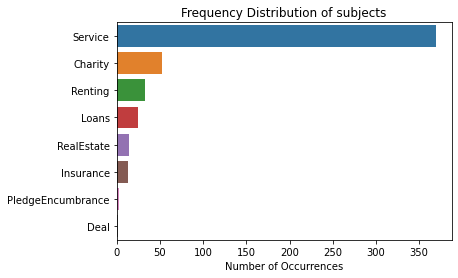


min 1
max 369
total 510
mean length is 1007.2392156862745


In [7]:


subj_count = dataset_manager.trainset_rows['subject'].value_counts()

#plot distribution
sns.barplot(subj_count.values, subj_count.index)
plt.title('Frequency Distribution of subjects')
plt.xlabel('Number of Occurrences')
plt.show()


print ('\nmin', min (subj_count.values))
print ('max', max (subj_count.values))
print ('total', sum (subj_count.values))

print('mean length is', dataset_manager.trainset_rows['len'].mean())

In [8]:
REVERSE_TRAIN_AND_TEST_SETS = False
VALIDATION_SET_PROPORTION = 0.22



print()
print('Number of  test_indices: ', len(dataset_manager.test_indices))
print('Number of train_indices:', len(dataset_manager.train_indices))
print()
print('--Documents included both in train and validation set')
np.intersect1d(dataset_manager.test_indices, dataset_manager.train_indices)


Number of  test_indices:  726
Number of train_indices: 2186

--Documents included both in train and validation set


array([ 52,  56,  72,  91,  97, 116])

## Batch generator

- [x] TODO: ~~try different embedding padding~~ --> not better =(
- [x] TODO: ~~the amount of noise in embedding may depend on popularity of class subject)~~ -->.. hm.. seems like it works
- [x] TODO: try `padded_batch` --> done. 
- [ ] TODO: select min or mean emb length in batch to pad batches
- [ ] TODO: add outliers to the trainset

In [0]:
MAX_SEQUENCE_LENGTH = 800 # mind that mean lenght is 1000
RANDOMIZE_EMB_PADDING = False

In [10]:
# def _noise_amount( subj ):
#   subj_popularity = subj_count[subj]
#   max_pop = max (subj_count.values)
#   return 1 - subj_popularity/max_pop

## debug ------
print()
for key in subj_count.index:
  print(key, dataset_manager._noise_amount(key))


Service 0.0
Charity 0.8590785907859079
Renting 0.9105691056910569
Loans 0.9322493224932249
RealEstate 0.962059620596206
Insurance 0.964769647696477
PledgeEncumbrance 0.991869918699187
Deal 0.997289972899729


In [0]:
import numpy as np
EMB_NOISE_AMOUNT = 0.05 #02
  

0.88 Газпром нефть Газпромнефть Шиппинг
0.93 Газпром нефть Газпромнефть-Аэро
0.94 Газпром нефть Газпромнефть-СМ
0.96 Газпромнефть-Аэро Газпромнефть-Энерго
0.97 Газпромнефть-СМ Газпромнефть-ЗС
0.98 Газпромнефть-МНПЗ Газпромнефть-ОНПЗ
HyperParameters.subsidiary_name_match_min_jaro_similarity 0.98


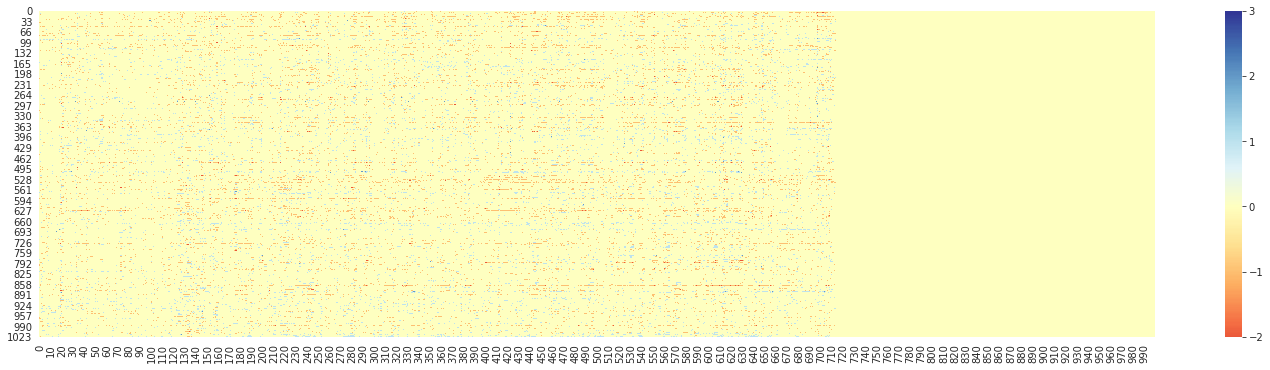

In [12]:
# ---- debug ---
_t_generator = gen = dataset_manager.get_generator(batch_size=1, all_indices=[0], randomize=True)
_t_x, _t_y =  next(_t_generator)
del _t_generator

plot_emb(_t_x[0])

#### Visualize embeddings 

In [0]:
## read sample doc pickle
#get sample doc
import pickle
fn_0 = dataset_manager.trainset_rows['pickle'].iloc[0]
with open(fn_0, "rb") as pickle_in:
  doc = pickle.load(pickle_in)


_df = pd.DataFrame()
_df['tokens'] = doc.tokens
# df

#### t-SNE fit

In [77]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1400, metric='cosine')
tsne_results = tsne.fit_transform(doc.embeddings)

_df['x']=tsne_results[:,0]
_df['y']=tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 714 samples in 0.002s...
[t-SNE] Computed neighbors for 714 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 714 / 714
[t-SNE] Mean sigma: 0.304918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.958839
[t-SNE] KL divergence after 1400 iterations: 0.772643


In [0]:
#### K-Means clusterize

In [0]:

from sklearn.cluster import KMeans
X = np.array([_df.x, _df.y]).T
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

_df['y_kmeans'] = y_kmeans


#### filter stop-words out

In [0]:
# filter it
stop_words=['(','ним',')', 'они',',','.',' ','\n','почему', 'мне', 'мы','со','то', 'для','его','твои','ты','если','ок','да','до','бы','а','к','по','про','этим','при','чем','тут','то','так','я','это', '--', '-', 'от', 'и', 'но', 'в', 'на', 'не', 'он', 'она', 'как', 'когда' , 'из', 'с', 'за', '', 'или', 'что', 'же', 'ли', 'нее']

# True or False in it
_lines = _df[~_df.tokens.isin(stop_words)]
df = _lines
# for t in df.tokens:
#   print (t)


#### Render it

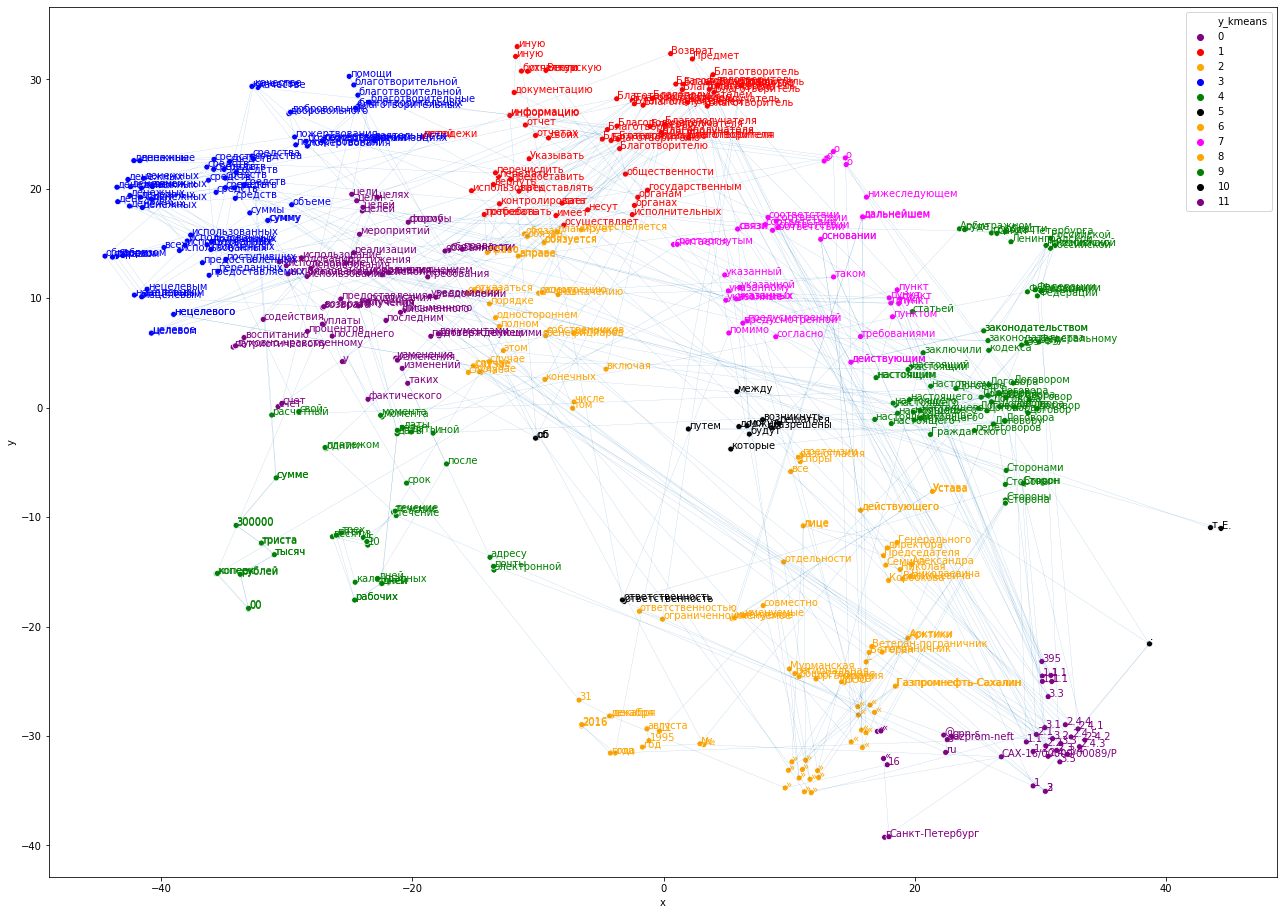

In [81]:
_palette=['purple','red','orange','blue',  'green', 'black','orange', 'magenta', 'orange', 'green', 'black', 'purple']
plt.figure(figsize=(22,16))

p1 = sns.scatterplot(df.x, df.y,  legend='full', palette=_palette , hue=df.y_kmeans)

for i, line in df.iterrows():
  p1.text(line.x + 0.05, line.y, line.tokens, 
          horizontalalignment='left', size='medium' , color=_palette[ line.y_kmeans ])
  
p1.plot(df.x[_slice], df.y[_slice], linewidth=0.2, alpha=0.5)


sample (48, 800, 1024)
sample (48, 43)


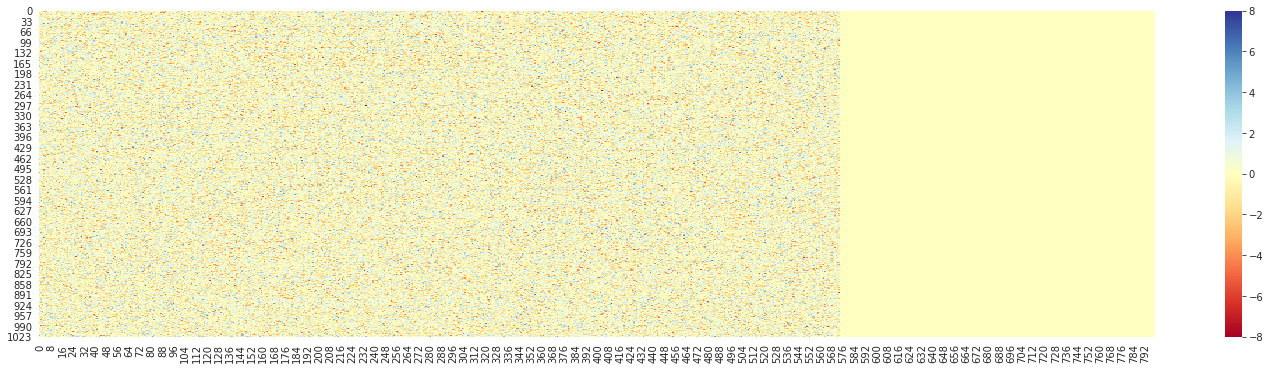

-8
8


In [13]:
EPOCHS=20
BATCH_SIZE=48
EMB=1024 #;//X.shape[-1]

CLASSES=len(list(dataset_manager.subject_name_1hot_map.values())[0])


#create gens
# test_generator = subj_batch_generator(BATCH_SIZE, all_indices = dataset_manager.test_indices, randomize=True)
test_generator = dataset_manager.get_generator(batch_size=BATCH_SIZE, all_indices=dataset_manager.test_indices, randomize=True)
next(test_generator)

train_generator = dataset_manager.get_generator(batch_size=BATCH_SIZE, all_indices=dataset_manager.train_indices, randomize=True)
# train_generator = subj_batch_generator(BATCH_SIZE, all_indices = dataset_manager.train_indices, randomize=True)
next(train_generator)

# all_generator = subj_batch_generator(BATCH_SIZE, all_indices = train_indices+test_indices)
# next(all_generator)

#debug ---------------------
_t_x, _t_y =  next(test_generator)
print("sample", _t_x.shape)
print("sample", _t_y.shape)

plot_emb(_t_x[1])
print(_t_x[1].min())
print(_t_x[1].max())

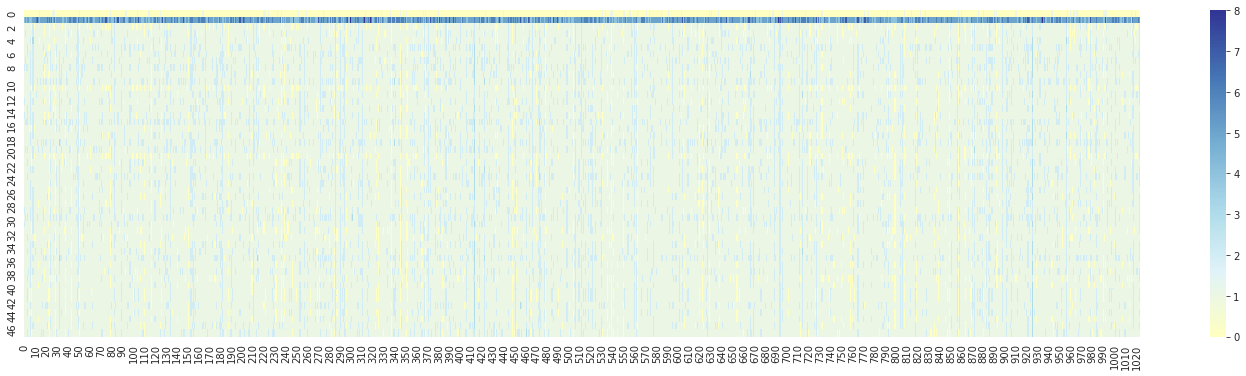

In [14]:
 
plot_emb(_t_x.max(axis=1).T)
# plot_emb(_t_x.mean(axis=1).T)

# Build Models

### common

In [15]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import classification_report
from IPython.display import SVG


from tensorflow import keras
from keras.layers import Conv1D, LSTM, GRU, BatchNormalization, TimeDistributed, Dense, Bidirectional, Input, Dropout
from keras.models import Sequential, Model
 

1.15.2


In [0]:
HISTORIES={}

def plot_training_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  

def plot_compare_models():
  for key in HISTORIES:
    history=HISTORIES[key]
#     plt.plot(history.history['loss'], label=f'{key} loss')
    plt.plot(history.history['val_loss'], label=f'{key} val_loss')
  
  plt.title('Models loss')   
  plt.legend(loc='upper left')
  plt.show()

In [17]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from os import mkdir

model_checkpoint_path = path.join(TRAINSETS_PATH, 'checkpoints', VERSION_PATH)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, min_lr=1E-6, verbose=1)

print('model_checkpoint_path', model_checkpoint_path)
 


model_checkpoint_path /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19


In [18]:
 
validation_steps = int(len(dataset_manager.test_indices)/BATCH_SIZE)
steps_per_epoch = int(len(dataset_manager.train_indices)/BATCH_SIZE/2)

print('validation_steps=', validation_steps)
print('steps_per_epoch=', steps_per_epoch)

def train_and_evaluate_model(model, generator=train_generator, test_generator=test_generator):
  
  print(f'model.name={model.name}')
  dataset_manager.print_parameters()


  checkpoint = ModelCheckpoint( path.join(model_checkpoint_path, model.name), 
                               monitor='val_loss', mode='min', save_best_only=True,
                               verbose=1) 
  history = model.fit_generator(
      generator=generator, 
      epochs=EPOCHS,  callbacks=[reduce_lr, checkpoint], steps_per_epoch=steps_per_epoch,
      validation_data=test_generator,
      validation_steps=validation_steps )

  HISTORIES[model.name]=history
  plot_training_history(history)
  plot_compare_models()



validation_steps= 15
steps_per_epoch= 22


## models

### 0.6458 baseline LSTM model (params: 172,163)

noise on embeddding: 0.02 * K
```
Epoch 10/10
loss: 0.4552 - acc: 0.8409 - val_loss: 0.9700 - val_acc: 0.6514
```

```
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.03
loss: 0.4801 - acc: 0.8163 - val_loss: 0.7155 - val_acc: 0.7403
```

```
MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=baseline_LSTM_model
Epoch 10/10
loss: 0.8650 - acc: 0.6686 - val_loss: 1.0799 - val_acc: 0.6458
```

In [0]:

# define baseline model
def baseline_LSTM_model():
  classes = min(10, CLASSES)

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
	 
  bi =  LSTM(classes*4, return_sequences=False)(input_text)  
  dense = Dense(CLASSES, activation='softmax')(bi)
  _out = dense
  model = Model(inputs=[input_text], outputs=_out, name='baseline_LSTM_model')
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  model.summary()
  return model



 
model = baseline_LSTM_model(  )
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
 

# print("TEST:--does it work?")
# k=model.predict( X)
# k[0]


Model: "baseline_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 40)                170400    
_________________________________________________________________
dense_7 (Dense)              (None, 43)                1763      
Total params: 172,163
Trainable params: 172,163
Non-trainable params: 0
_________________________________________________________________


MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.05
model.name=baseline_LSTM_model
Epoch 1/10
22/22 [==============================] - 145s 7s/step - loss: 3.2841 - acc: 0.1383 - val_loss: 3.0172 - val_acc: 0.1319

Epoch 00001: val_loss improved from inf to 3.01718, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/baseline_LSTM_model
Epoch 2/10
22/22 [==============================] - 123s 6s/step - loss: 2.5307 - acc: 0.3456 - val_loss: 2.5820 - val_acc: 0.3292

Epoch 00002: val_loss improved from 3.01718 to 2.58201, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/baseline_LSTM_model
Epoch 3/10
22/22 [==============================] - 127s 6s/step - loss: 2.0873 - acc: 0.4157 - val_loss: 2.4955 - val_acc: 0.1708

Epoch 00003: val_loss improved from 2.58201 to 2.49548, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/baseline_LSTM_model
Epoch 4/10
22/22 [=================

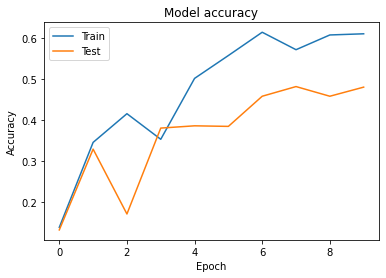

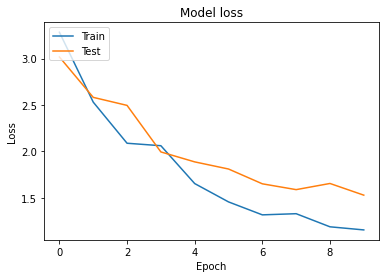

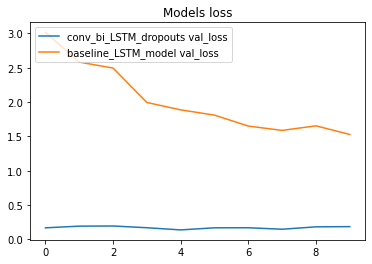

In [0]:
# EPOCHS=10
train_and_evaluate_model(model)

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=10)
print(e)

### 0.7819 baseline bi-GRU  model (params: 127,163)
overfits?
```
MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=simple_bi_GRU_model
Epoch 32/32
loss: 0.0332 - acc: 1.0000 - val_loss: 0.8483 - val_acc: 0.7819
```

In [0]:
def simple_bi_GRU_model(name="new_model"):
  classes = min(10, CLASSES)

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
	 
  bi =  Bidirectional(GRU(classes*2, return_sequences=False))(input_text)   
  dense = Dense(CLASSES, activation='softmax')(bi)
  _out = dense
  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  model.summary()
  
  return model


 
model = simple_bi_GRU_model( simple_bi_GRU_model.__name__ )
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

# print("TEST:--does it work?")
# k=model.predict( X)
# k[0]


Model: "simple_bi_GRU_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                125400    
_________________________________________________________________
dense_2 (Dense)              (None, 43)                1763      
Total params: 127,163
Trainable params: 127,163
Non-trainable params: 0
_________________________________________________________________


In [0]:
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=simple_bi_GRU_model
Epoch 1/32
22/22 [==============================] - 111s 5s/step - loss: 2.9966 - acc: 0.4621 - val_loss: 2.4342 - val_acc: 0.5514

Epoch 00001: val_loss improved from inf to 2.43419, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_bi_GRU_model
Epoch 2/32
22/22 [==============================] - 98s 4s/step - loss: 1.7923 - acc: 0.6941 - val_loss: 1.5961 - val_acc: 0.7139

Epoch 00002: val_loss improved from 2.43419 to 1.59615, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_bi_GRU_model
Epoch 3/32
22/22 [==============================] - 97s 4s/step - loss: 1.1339 - acc: 0.8258 - val_loss: 1.1960 - val_acc: 0.7222

Epoch 00003: val_loss improved from 1.59615 to 1.19598, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_bi_GRU_model
Epoch 4/32
22/22 [===================

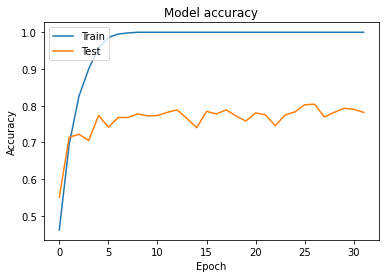

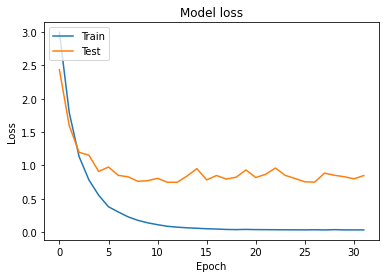

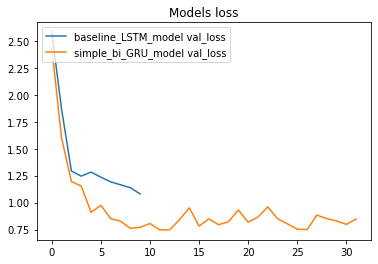

In [0]:

EPOCHS=32
train_and_evaluate_model(model)

In [0]:
model.evaluate_generator(generator=test_generator, steps=100)

In [0]:
model.evaluate_generator(generator=train_generator, steps=100)

### 0.8403 👽 bi-LSTMx16 + dropout (0.1)   (params: 134,667)

```
MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=simple_bi_LSTM_dropouts
Epoch 20 
loss: 0.0322 - acc: 1.0000 - val_loss: 0.6040 - val_acc: 0.8403
```
 

In [0]:
def simple_bi_LSTM_dropouts(name="new_model"):
   
  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")

  _out=input_text
  _out = Dropout(0.1, name="drops")(_out)
  _out = Bidirectional(LSTM(16, return_sequences=False))(_out)   
  _out = Dense(CLASSES, activation='softmax')(_out)
  

  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  
  
  
  return model

model = simple_bi_LSTM_dropouts( simple_bi_LSTM_dropouts.__name__ )

from keras.models import load_model
model = load_model(path.join(model_checkpoint_path, model.name))
model.summary()

Model: "simple_bi_LSTM_dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                133248    
_________________________________________________________________
dense_1 (Dense)              (None, 43)                1419      
Total params: 134,667
Trainable params: 134,667
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS=20
train_and_evaluate_model(model)

In [0]:
model.evaluate_generator(generator=test_generator, steps=100)

In [0]:
model.evaluate_generator(generator=train_generator, steps=100)

### 0.5014 simple LSTM model + HUuuge Dropouts (params: 172,163)
```
MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
Epoch 32/32
loss: 0.8510 - acc: 0.6676 - val_loss: 1.3039 - val_acc: 0.5014
```

In [0]:

# define baseline model
def simple_LSTM_model_drops(name="no_name"):
  classes = min(10, CLASSES)

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
	 
  bi =  LSTM(classes*4, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)(input_text)  
  dense = Dense(CLASSES, activation='softmax')(bi)
  _out = dense
  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  
  model.summary()
  return model


 
model = simple_LSTM_model_drops( simple_LSTM_model_drops.__name__ )
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
 

# print("TEST:--does it work?")
# k=model.predict( X)
# k[0]


MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=simple_LSTM_model_drops
Epoch 1/32
22/22 [==============================] - 97s 4s/step - loss: 3.0215 - acc: 0.2888 - val_loss: 1.9471 - val_acc: 0.3736

Epoch 00001: val_loss improved from inf to 1.94709, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_LSTM_model_drops
Epoch 2/32
22/22 [==============================] - 89s 4s/step - loss: 1.5133 - acc: 0.5227 - val_loss: 1.3196 - val_acc: 0.4944

Epoch 00002: val_loss improved from 1.94709 to 1.31965, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_LSTM_model_drops
Epoch 3/32
22/22 [==============================] - 90s 4s/step - loss: 1.1016 - acc: 0.6136 - val_loss: 1.3108 - val_acc: 0.4778

Epoch 00003: val_loss improved from 1.31965 to 1.31080, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/simple_LSTM_model_drops
Epoch 4/32
22/22 [====

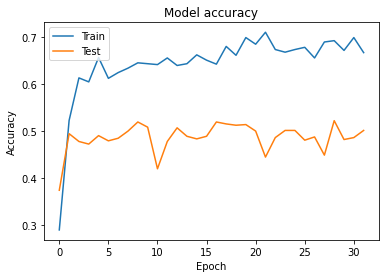

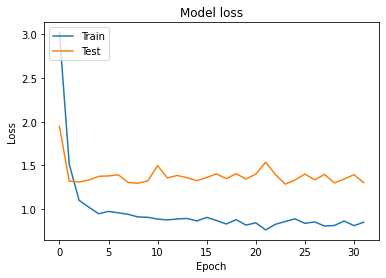

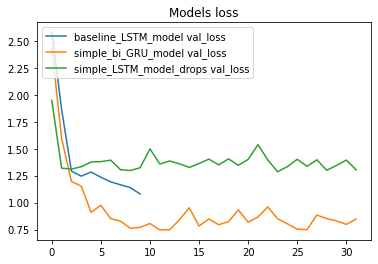

In [0]:
# EPOCHS=16
train_and_evaluate_model(model)

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=100)
print(e)

In [0]:
e=model.evaluate_generator(generator=all_generator, steps=100)
print(e)

### 0.7347 10-LSTM (+ recurrent_dropout) [ params: 41,873 ]

```
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.03
Epoch 10/10
loss: 0.7828 - acc: 0.8030 - val_loss: 0.9723 - val_acc: 0.7347
```

In [0]:

# define baseline model
def smaller_LSTM_model_drops(name="no_name"):
  classes = min(10, CLASSES)

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
	 
  bi =  LSTM(classes, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)(input_text)  
  dense = Dense(CLASSES, activation='softmax')(bi)
  _out = dense
  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  
  model.summary()
  return model


 
model = smaller_LSTM_model_drops( smaller_LSTM_model_drops.__name__ )
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
 

In [0]:
EPOCHS=10
train_and_evaluate_model(model)

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=100)
print(e)

In [0]:
e=model.evaluate_generator(generator=all_generator, steps=100)
print(e)

### 0.7417 👙 16-LSTM + Dropout layer (params: 67,355)

```
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.03
Dropout 0.05
loss: 0.5523 - acc: 0.8352 - val_loss: 0.7427 - val_acc: 0.7417
```

```
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.01
loss: 0.5662 - acc: 0.8324 - val_loss: 0.8604 - val_acc: 0.7111
```

In [0]:

# define baseline model
def small_LSTM_model_dropout_l(name="no_name"):
  classes = min(16, CLASSES) 

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
	
  dr = Dropout(0.05, name="drops")(input_text)
  # bi =  LSTM(classes, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)(dr)  
  bi =  LSTM(classes, return_sequences=False, dropout=0.01, recurrent_dropout=0.01)(dr)  
  dense = Dense(CLASSES, activation='softmax')(bi)
  _out = dense
  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  
  model.summary()
  return model


 
model = small_LSTM_model_dropout_l( small_LSTM_model_dropout_l.__name__ )
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
 

Model: "small_LSTM_model_dropout_l"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                66624     
_________________________________________________________________
dense_4 (Dense)              (None, 43)                731       
Total params: 67,355
Trainable params: 67,355
Non-trainable params: 0
_________________________________________________________________


In [0]:

train_and_evaluate_model(model)

MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=small_LSTM_model_dropout_l
Epoch 1/32
22/22 [==============================] - 100s 5s/step - loss: 3.2460 - acc: 0.3371 - val_loss: 2.8385 - val_acc: 0.3931

Epoch 00001: val_loss improved from inf to 2.83849, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/small_LSTM_model_dropout_l
Epoch 2/32
22/22 [==============================] - 87s 4s/step - loss: 2.3183 - acc: 0.5436 - val_loss: 2.4422 - val_acc: 0.3833

Epoch 00002: val_loss improved from 2.83849 to 2.44216, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/small_LSTM_model_dropout_l
Epoch 3/32
22/22 [==============================] - 87s 4s/step - loss: 1.9370 - acc: 0.5161 - val_loss: 1.8811 - val_acc: 0.3792

Epoch 00003: val_loss improved from 2.44216 to 1.88105, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/small_LSTM_model_dropout_l
Epoch 4/3

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=20)
print(e)

In [0]:
e=model.evaluate_generator(generator=all_generator, steps=100)
print(e)

### 0.6917 Conv + 43-LSTM (params: 61,380)

```
Epoch 10/10
loss: 0.5654 - acc: 0.8011 - val_loss: 0.6737 - val_acc: 0.7903
```

```
filters = 16
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.03
model.name=bigger_LSTM_model_noise_l_n1

Epoch 10/10
loss: 0.4150 - acc: 0.8352 - val_loss: 0.8515 - val_acc: 0.6917
```

In [0]:
from keras.layers import GaussianNoise, GaussianDropout, Conv1D

# define baseline model
def bigger_LSTM_model_noise_l(name="no_name"):
  # classes = min(16, CLASSES)

  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
  _layer = input_text

  _layer = Conv1D( filters = 16, kernel_size=(3), padding='same', activation='relu' )(_layer)

 
  # _layer = GaussianNoise(0.1, name="noise")(_layer)  
  
  _layer = LSTM(CLASSES, return_sequences=False, dropout=0.001, recurrent_dropout=0.001)(_layer)  
  _layer = Dense(CLASSES, activation='softmax')(_layer)


  model = Model(inputs=[input_text], outputs=_layer, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])
  
  model.summary()
  return model


 
model = bigger_LSTM_model_noise_l( bigger_LSTM_model_noise_l.__name__+"_n1" )
# SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
 

In [0]:
EPOCHS=10
train_and_evaluate_model(model)

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=20)
print(e)

In [0]:
e=model.evaluate_generator(generator=all_generator, steps=10)
print(e)

### 0.7667 Conv + 16-LSTM  + Dropout layer (params: 68,395)

```
MAX_SEQUENCE_LENGTH=800
EMB_NOISE_AMOUNT=0.01
model.name=Conv_16x4_LSTM_d5
Epoch 10
loss: 0.5997 - acc: 0.8201 - val_loss: 0.7436 - val_acc: 0.7667
```

 

In [0]:
from keras.layers import GaussianNoise, GaussianDropout, Conv1D


def Conv_16x4_LSTM(name="no_name"):
   
  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")
  _layer = input_text

  _layer = Dropout(0.05, name="drops")(_layer)  
  _layer = Conv1D( filters = 16, kernel_size=(4), padding='same', activation='relu' )(_layer)
  _layer = LSTM(16, return_sequences=False, dropout=0.001, recurrent_dropout=0.001)(_layer)  
  _layer = Dense(CLASSES, activation='softmax')(_layer)


  model = Model(inputs=[input_text], outputs=_layer, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])
  
  model.summary()
  return model


 
model = Conv_16x4_LSTM( Conv_16x4_LSTM.__name__+"_d5" )
 

Model: "Conv_16x4_LSTM_d5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          65552     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 43)                731       
Total params: 68,395
Trainable params: 68,395
Non-trainable params: 0
_________________________________________________________________


In [0]:
# EPOCHS=10
train_and_evaluate_model(model)

MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.02
model.name=Conv_16x4_LSTM_d5
Epoch 1/32
22/22 [==============================] - 106s 5s/step - loss: 3.4064 - acc: 0.1430 - val_loss: 2.9379 - val_acc: 0.1292

Epoch 00001: val_loss improved from inf to 2.93793, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/Conv_16x4_LSTM_d5
Epoch 2/32
22/22 [==============================] - 94s 4s/step - loss: 2.3346 - acc: 0.3182 - val_loss: 1.8815 - val_acc: 0.3736

Epoch 00002: val_loss improved from 2.93793 to 1.88150, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/Conv_16x4_LSTM_d5
Epoch 3/32
22/22 [==============================] - 98s 4s/step - loss: 1.6666 - acc: 0.5085 - val_loss: 1.5626 - val_acc: 0.4153

Epoch 00003: val_loss improved from 1.88150 to 1.56262, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/Conv_16x4_LSTM_d5
Epoch 4/32
22/22 [===========================

In [0]:
e=model.evaluate_generator(generator=test_generator, steps=20)
print(e)

In [0]:
e=model.evaluate_generator(generator=all_generator, steps=10)
print(e)

### 👽👽 0.9583 Сonv + maxPool + bi-LSTMx16 +  dropout (0.1)   (params: 136,731)

```
MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.05

Epoch 20
loss: 0.0206 - acc: 1.0000 - val_loss: 0.3490 - val_acc: 0.9417

Epoch 40
loss: 0.0185 - acc: 1.0000 - val_loss: 0.1850 - val_acc: 0.9583
```
 

In [0]:
from keras.layers import MaxPooling1D
def conv_bi_LSTM_dropouts(name="new_model"):
   
  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")

  _out=input_text
  _out = Dropout(0.1, name="drops")(_out)
  _out = Conv1D( filters = 16, kernel_size=(8), padding='same', activation='relu' )(_out)
  _out = MaxPooling1D(pool_size=2)(_out)
  _out = Bidirectional(LSTM(16, return_sequences=False))(_out)   
  _out = Dense(CLASSES, activation='softmax')(_out)
  

  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

  return model

model = conv_bi_LSTM_dropouts( conv_bi_LSTM_dropouts.__name__+"_rev" )




Model: "conv_bi_LSTM_dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 16)          131088    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_6 (Dense)              (None, 43)                1419      
Total params: 136,731
Trainable params: 136,731
Non-trainable params: 0
_______________________________________

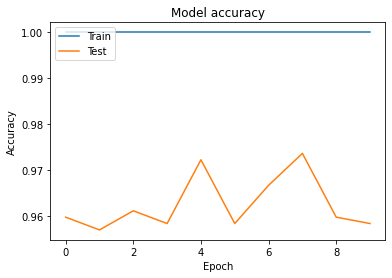

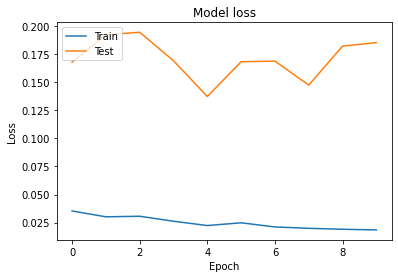

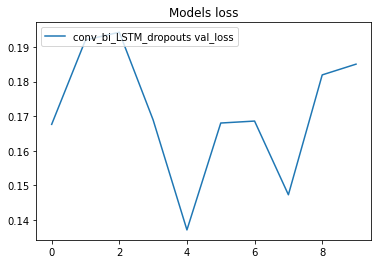

In [0]:
from keras.models import load_model
model1 = load_model(path.join(model_checkpoint_path, conv_bi_LSTM_dropouts.__name__))
model1.summary()
EPOCHS=10
train_and_evaluate_model(model1)

In [0]:
EPOCHS=20
train_and_evaluate_model(model)

MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.05
model.name=conv_bi_LSTM_dropouts_rev
Epoch 1/20
22/22 [==============================] - 171s 8s/step - loss: 2.6756 - acc: 0.4867 - val_loss: 1.5879 - val_acc: 0.6847

Epoch 00001: val_loss improved from inf to 1.58792, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_dropouts_rev
Epoch 2/20
22/22 [==============================] - 153s 7s/step - loss: 1.0923 - acc: 0.9233 - val_loss: 0.6384 - val_acc: 0.9819

Epoch 00002: val_loss improved from 1.58792 to 0.63843, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_dropouts_rev
Epoch 3/20
22/22 [==============================] - 156s 7s/step - loss: 0.4720 - acc: 0.9943 - val_loss: 0.3241 - val_acc: 0.9986

Epoch 00003: val_loss improved from 0.63843 to 0.32410, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_dropouts_rev
Epoch 4/20


### 👽 0.9000 Сonv + maxPool + bi-LSTMx16 +  dropout (0.2)   (params: 103,447)

```
model.name=conv_bi_LSTM_heavy_dropouts
outliers_percent=0.1
noisy_samples_amount=0.5
noise_amount=0.1
Epoch 32
loss: 0.1221 - acc: 0.9650 - val_loss: 0.2427 - val_acc: 0.9000
```
 

 ```
Trainable params: 103,447
outliers_percent=0.1
noisy_samples_amount=0.75
noise_amount=0.05
loss: 0.1334 - acc: 0.9650 - val_loss: 0.2632 - *val_acc: 0.9083*
 ```

In [0]:
from keras.layers import MaxPooling1D
def conv_bi_LSTM_heavy_dropouts(name="new_model"):
   
  input_text = Input(shape=[ None, EMB], dtype='float32', name="input_text_emb")

  _out=input_text
  _out = Dropout(0.15, name="drops")(_out)
  _out = Conv1D( filters = 12, kernel_size=(8), padding='same', activation='relu' )(_out)
  _out = MaxPooling1D(pool_size=2)(_out)
  _out = Bidirectional(LSTM(16, return_sequences=False))(_out)   
  _out = Dense(CLASSES, activation='softmax')(_out)
  

  model = Model(inputs=[input_text], outputs=_out, name=name)
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

  return model

model = conv_bi_LSTM_heavy_dropouts( conv_bi_LSTM_heavy_dropouts.__name__ )








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "conv_bi_LSTM_heavy_dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 12)          98316     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 12)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                3712      
_________________________________________________________________
dense_3 (Dense)              (None, 43)                1419      
Tot

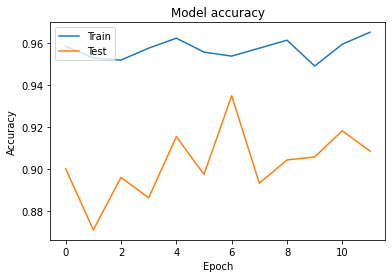

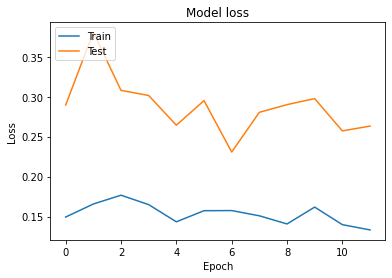

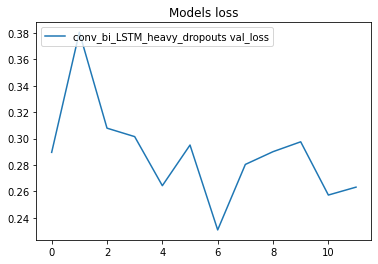

In [22]:
from keras.models import load_model
model = load_model(path.join(model_checkpoint_path, conv_bi_LSTM_heavy_dropouts.__name__))
model.summary()
#---
dataset_manager.noisy_samples_amount = 0.75
dataset_manager.outliers_percent = 0.1
dataset_manager.noise_amount = 0.05
#---
EPOCHS=12
train_and_evaluate_model(model)

In [0]:
# more training
EPOCHS=20
train_and_evaluate_model(model)

model.name=conv_bi_LSTM_heavy_dropouts
outliers_percent=0.1
noisy_samples_amount=0.75
noise_amount=0.05
Epoch 1/20
22/22 [==============================] - 142s 6s/step - loss: 0.1354 - acc: 0.9583 - val_loss: 0.2370 - val_acc: 0.9194

Epoch 00001: val_loss improved from inf to 0.23695, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_heavy_dropouts
Epoch 2/20
22/22 [==============================] - 129s 6s/step - loss: 0.1203 - acc: 0.9650 - val_loss: 0.2917 - val_acc: 0.8903

Epoch 00002: val_loss did not improve from 0.23695
Epoch 3/20
22/22 [==============================] - 130s 6s/step - loss: 0.1080 - acc: 0.9669 - val_loss: 0.2826 - val_acc: 0.9014

Epoch 00003: val_loss did not improve from 0.23695
Epoch 4/20
21/22 [===========================>..] - ETA: 4s - loss: 0.1331 - acc: 0.9583

#Train final model

### conv_bi_LSTM_dropouts_final

```
EMB_NOISE_AMOUNT=0.05
conv_bi_LSTM_dropouts_final

Epoch 40/40
loss: 0.0087 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000
```

MAX_SEQUENCE_LENGTH=800
RANDOMIZE_EMB_PADDING=False
EMB_NOISE_AMOUNT=0.05
model.name=conv_bi_LSTM_dropouts_final
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





23/23 [==============================] - 227s 10s/step - loss: 2.8053 - acc: 0.4692 - val_loss: 1.7348 - val_acc: 0.9263

Epoch 00001: val_loss improved from inf to 1.73479, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_dropouts_final
Epoch 2/40
23/23 [==============================] - 176s 8s/step - loss: 1.2242 - acc: 0.9049 - val_loss: 1.4538 - val_acc: 0.6731

Epoch 00002: val_loss improved from 1.73479 to 1.45377, saving model to /content/drive/My Drive/GazpromOil/trainsets/checkpoints/1_1_19/conv_bi_LSTM_dropouts_final
Epoch 3/40
23/23 [==============================] - 170s 7s/step - loss: 0.8778 - acc: 0.9103 - val_loss: 0.5487 - val_acc: 0.9984

Epoch 00003: val_loss improved from 1.45377 to 0.54872, saving m

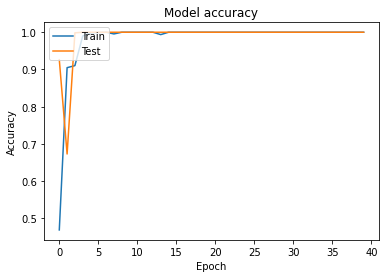

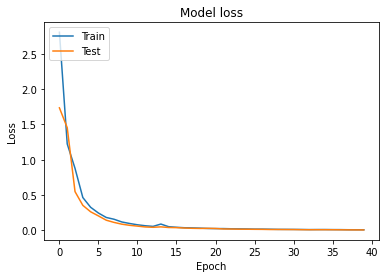

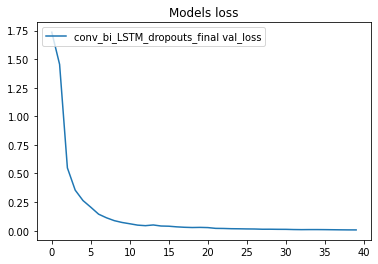

In [0]:
# generator

EPOCHS =40
all_generator = subj_batch_generator(BATCH_SIZE, all_indices = train_indices+test_indices, randomize=True)
final_model = conv_bi_LSTM_dropouts( conv_bi_LSTM_dropouts.__name__+"_final" )
train_and_evaluate_model(final_model, generator=all_generator)

# Playground

#### load model

In [24]:
model_name = 'conv_bi_LSTM_heavy_dropouts'#conv_bi_LSTM_dropouts.__name__+""
from keras.models import load_model
model1 = load_model(path.join(model_checkpoint_path, model_name))
model1.summary()

Model: "conv_bi_LSTM_heavy_dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text_emb (InputLayer)  (None, None, 1024)        0         
_________________________________________________________________
drops (Dropout)              (None, None, 1024)        0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          65552     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_3 (Dense)              (None, 43)                1419      
Total params: 71,195
Trainable params: 71,195
Non-trainable params: 0
___________________________________

#### Predict all

In [0]:
# model=final_model
from analyser.structures import ContractSubject


model=model1
row_no:int=0

prediction_col_name='predicted_subj'

results = dataset_manager._trainset_meta[ dataset_manager._trainset_meta['subject']!='?' ].copy()
results[prediction_col_name]='?'
results[prediction_col_name+"_conf"]=0.0
results[prediction_col_name+"_valid"]=False

for index, row in results.iterrows():
  row_by_no = results.iloc[row_no]

  _subj=row_by_no['subject']
  _filename=row_by_no['pickle']   
  
  _emb = dataset_manager.get_embeddings_raw(_filename)  
  _onehot = dataset_manager.subject_name_1hot_map[ _subj ]


  result = model.predict( np.array( []+ [_emb]) )
  max_i=result[0].argmax()
  predicted_subj_name=ContractSubject(max_i).name

  results[prediction_col_name][index]  = predicted_subj_name
  results[prediction_col_name+"_conf"][index]  = result[0][max_i]
  results[prediction_col_name+"_valid"][index]  = predicted_subj_name==_subj

  print(row_no, index, _subj,'-->', predicted_subj_name, row_by_no['valid'], result[0][max_i] )
  

  if row_no%5==0:
    results.to_csv(path.join(model_checkpoint_path, model.name)+'.csv', encoding='utf-8', index=True)
    results.to_csv(  model.name+'.csv', encoding='utf-8', index=True)

  row_no+=1

  # if row_no > 21:
  #   break

results.to_csv(  model.name+'.csv', encoding='utf-8', index=True)

In [0]:

# model_validation_meta[model_validation_meta[prediction_col_name] != '?']